<a id="setup"></a>
# <p style="background-color: blue; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Exploratory Data Analysis</p>



<a id="libraries"></a>
# <b><span style='color:lightblue'> Importing Necessary Libraries</span></b>

In [56]:
import pandas as pd
import numpy as np
import os
import sys

import seaborn as sns
import matplotlib.pyplot as plt

<a id="load_dataset"></a>
# <b><span style='color:lightblue'> Load Dataset</span></b>

In [60]:
# Reading train from downloaded dataset

sys.path.append("..") 

train_df = pd.read_csv('../data/train.csv')

df = train_df

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
1,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
4,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


<a id="initial_analysis"></a>
# <p style="background-color: #4893D7; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 1 | Initial Data Analysis</p>

<a id="Dataset_overview"></a>
# <b><span style='color:4893D7'>Step 1.1 |</span><span style='color:lightblue'> Dataset Overview</span></b>

In [61]:
df.shape

(5634, 21)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


<a id="summary_statistics"></a>
# <b><span style='color:4893D7'>Step 1.2 |</span><span style='color:lightblue'> Summary Statistics</span></b>

In [63]:
# Identify true missing values in numeric
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [64]:
# Identify nulls in numeric

custom_null_values = ['', ' ', '   ', 'NA', 'na', 'Na', 'NaN', 'nan', 'Nan', 'null', 'NULL', 'Null', 'None', 'none']

for col in df.select_dtypes(include='object').columns:
    mask = df[col].isin(custom_null_values)
    print(f"{col}: {mask.sum()} hidden null-like values")


customerID: 0 hidden null-like values
gender: 0 hidden null-like values
Partner: 0 hidden null-like values
Dependents: 0 hidden null-like values
PhoneService: 0 hidden null-like values
MultipleLines: 0 hidden null-like values
InternetService: 0 hidden null-like values
OnlineSecurity: 0 hidden null-like values
OnlineBackup: 0 hidden null-like values
DeviceProtection: 0 hidden null-like values
TechSupport: 0 hidden null-like values
StreamingTV: 0 hidden null-like values
StreamingMovies: 0 hidden null-like values
Contract: 0 hidden null-like values
PaperlessBilling: 0 hidden null-like values
PaymentMethod: 0 hidden null-like values
TotalCharges: 10 hidden null-like values
Churn: 0 hidden null-like values


In [65]:
# Numerical features

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5634.000000
mean,0.160809,32.373092,64.864253
std,0.367388,24.424539,30.089324
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.525000
75%,0.000000,55.000000,89.937500
max,1.000000,72.000000,118.600000


In [66]:
# Non-numerical features

df.describe(include=[object])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634
unique,5634,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5300,2
top,4223-BKEOR,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,2887,2904,3951,5082,2685,2481,2810,2448,2489,2791,2239,2223,3083,3325,1887,10,4138


In [67]:
# function to calculate % of each value within a feature:

def value_counts_with_percentages(series):
    counts = series.value_counts(dropna=False)
    percentages = round((counts / len(series)) * 100, 2)
    return pd.DataFrame({'Count': counts, 'Percentage (%)': percentages})

# Loop through non-numerical columns and print summaries
non_numeric_cols = df.select_dtypes(include=['object', 'category']).columns
non_numeric_cols = [col for col in non_numeric_cols if col not in (['customerID', 'TotalCharges'])]

for col in non_numeric_cols:
    print(f"\n{'='*60}")
    print(f"Feature: {col}")
    print(value_counts_with_percentages(df[col]))



Feature: gender
        Count  Percentage (%)
gender                       
Male     2887           51.24
Female   2747           48.76

Feature: Partner
         Count  Percentage (%)
Partner                       
No        2904           51.54
Yes       2730           48.46

Feature: Dependents
            Count  Percentage (%)
Dependents                       
No           3951           70.13
Yes          1683           29.87

Feature: PhoneService
              Count  Percentage (%)
PhoneService                       
Yes            5082            90.2
No              552             9.8

Feature: MultipleLines
                  Count  Percentage (%)
MultipleLines                          
No                 2685           47.66
Yes                2397           42.55
No phone service    552            9.80

Feature: InternetService
                 Count  Percentage (%)
InternetService                       
Fiber optic       2481           44.04
DSL               1939        

<a id="Feature_Investigation_outliers"></a>
# <b><span style='color:4893D7'>Step 2.3 |</span><span style='color:lightblue'> Feature Investigation (Outliers)</span></b>

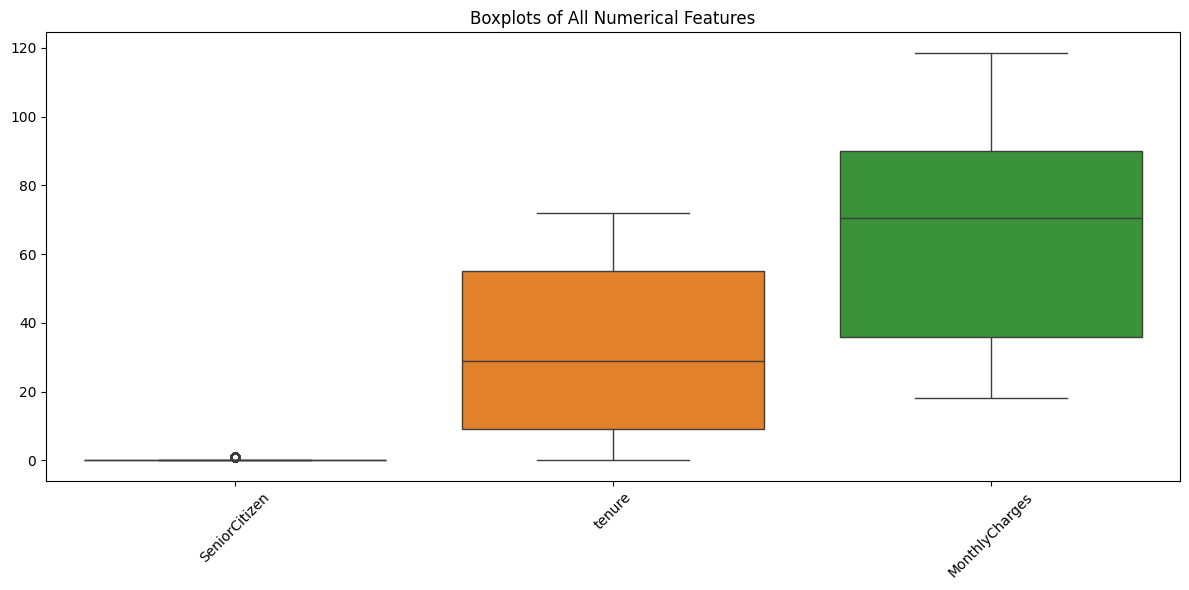

In [68]:
# Visualising and understanding outliers within numerical features 

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.title("Boxplots of All Numerical Features")
plt.tight_layout()
plt.show()

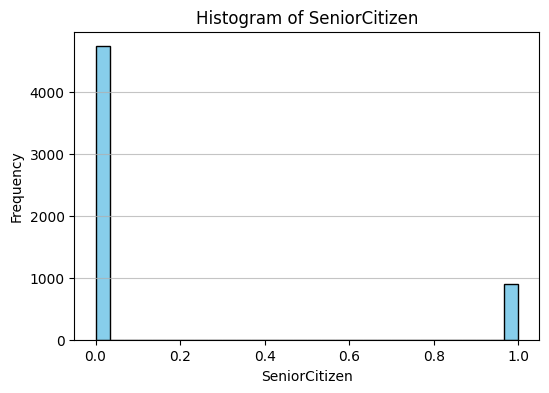

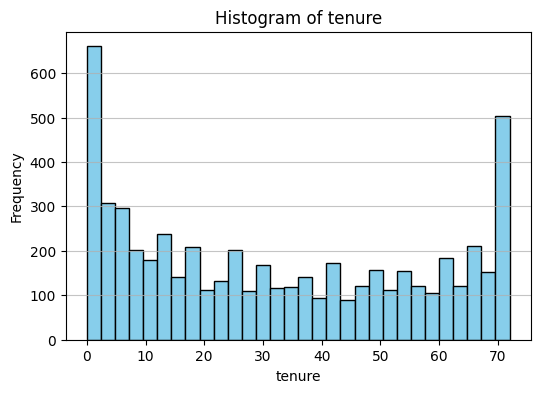

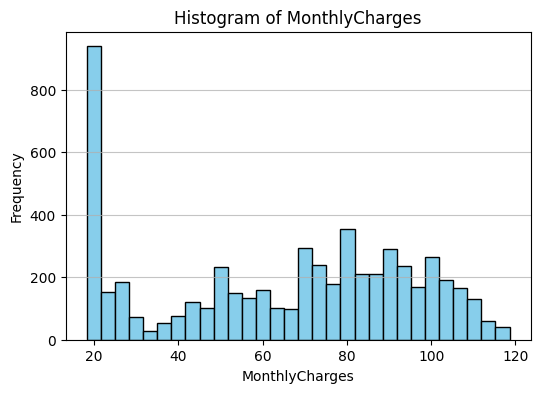

In [69]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

for col in numeric_columns:
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

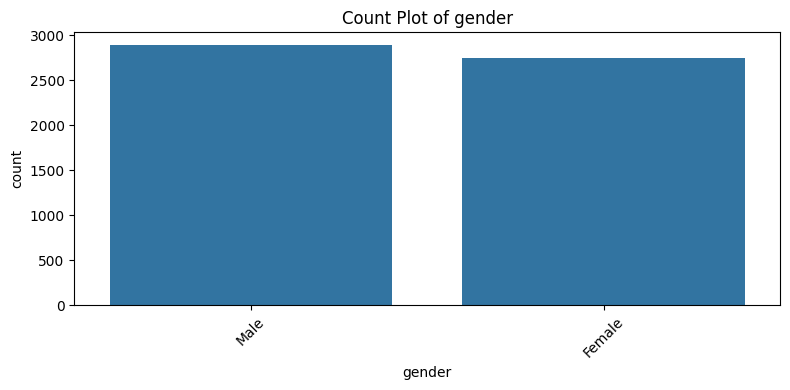

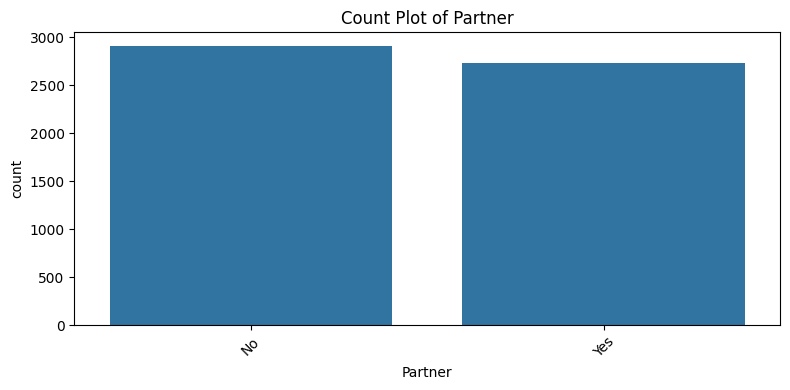

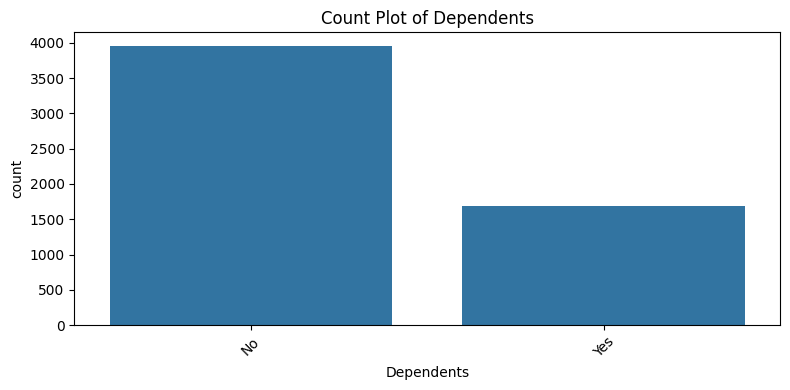

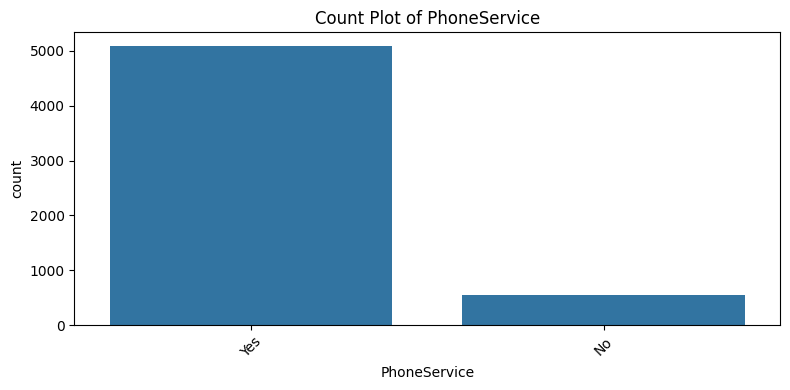

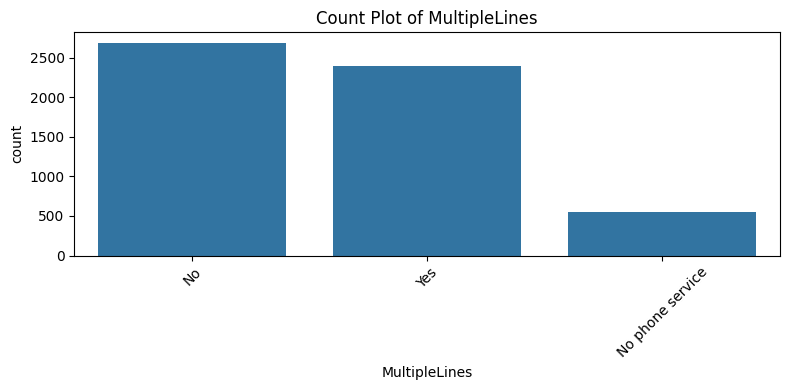

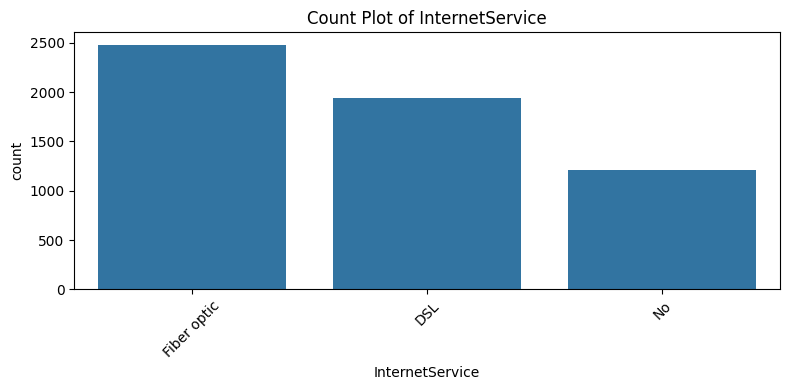

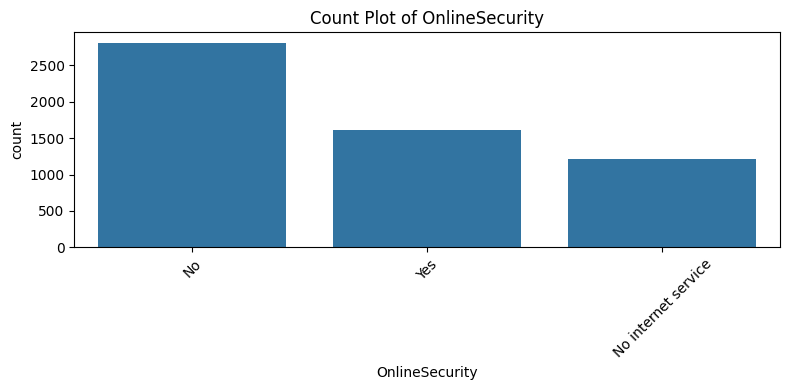

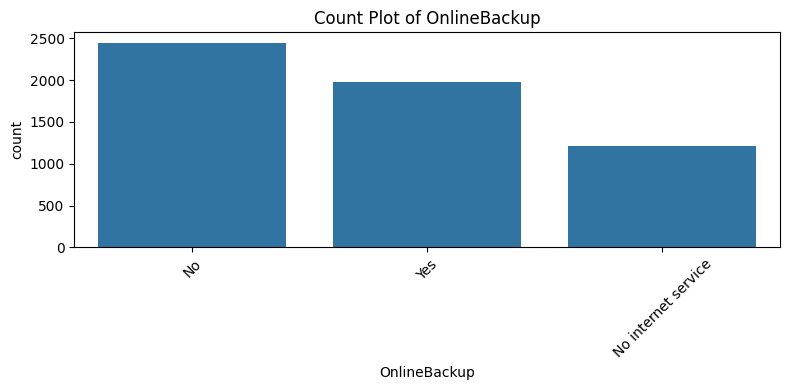

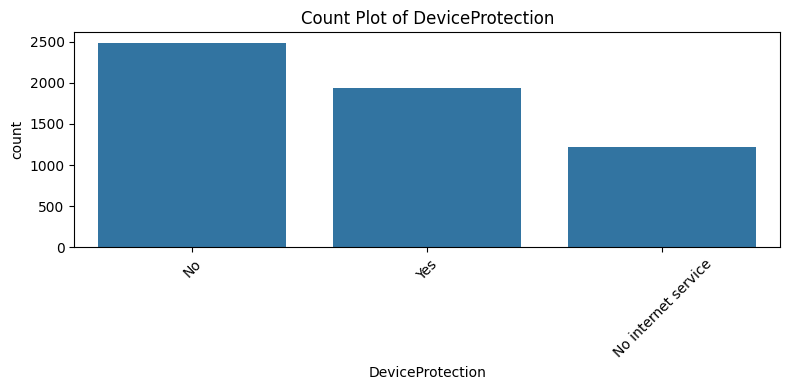

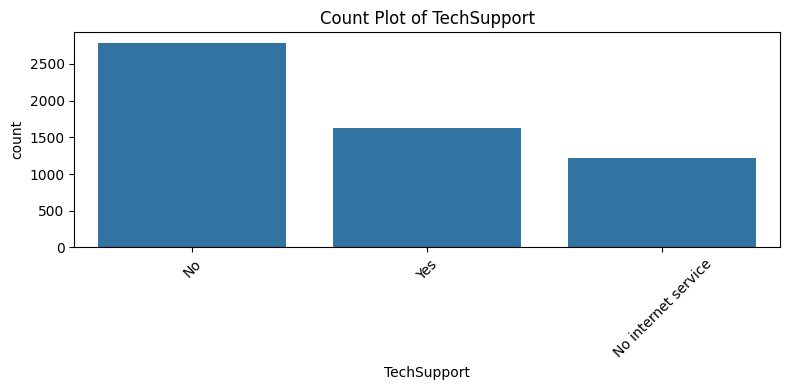

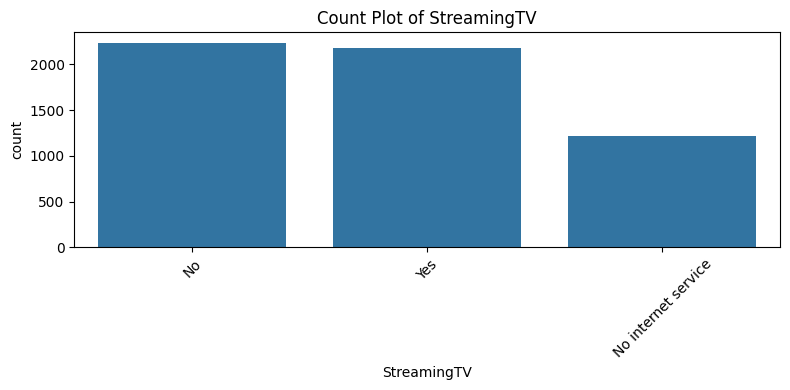

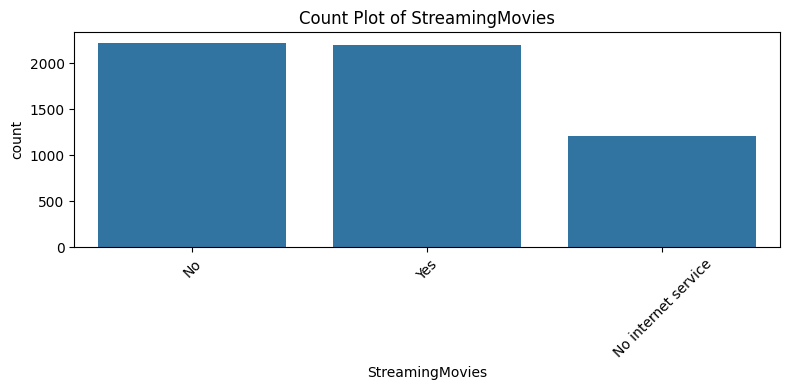

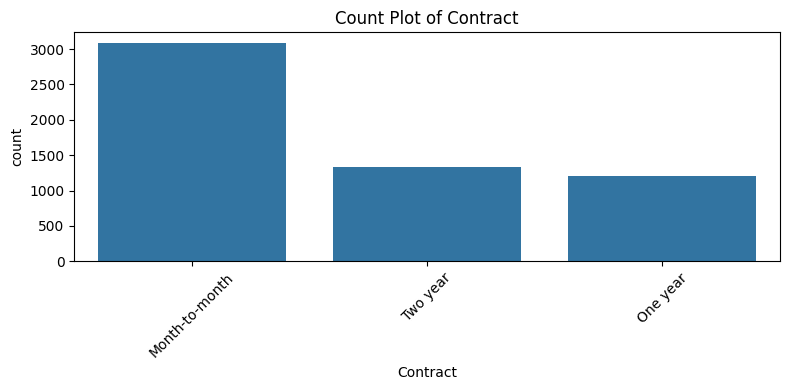

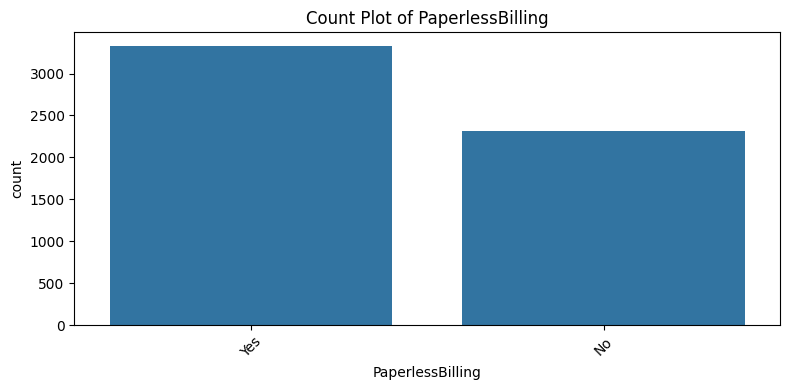

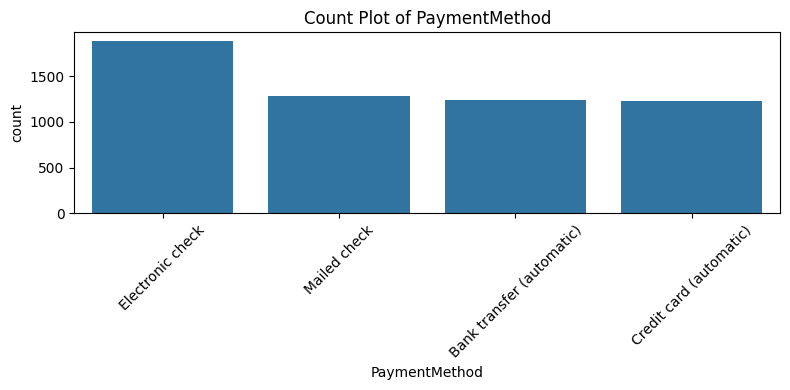

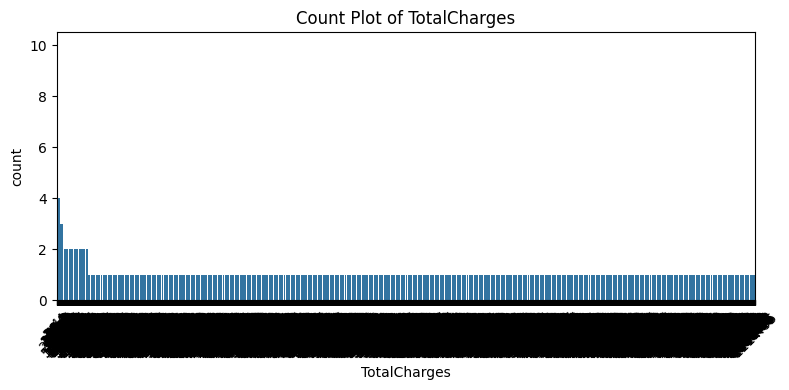

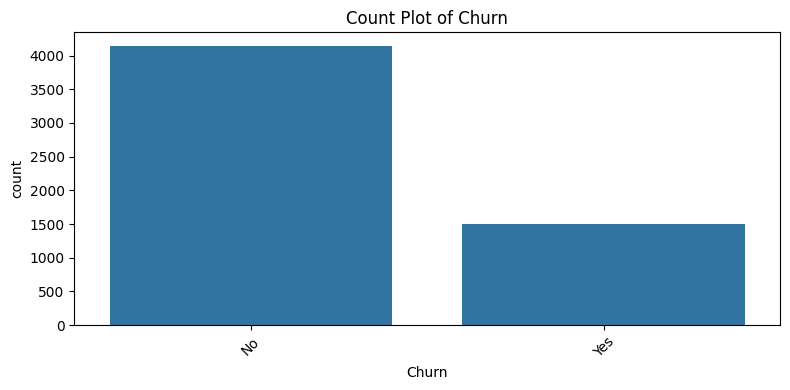

In [70]:
# Visualising and understanding outliers within non-numerical features 

for col in df.select_dtypes(include='object').columns.drop('customerID'):
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [71]:
df['TotalCharges'].sort_values().value_counts()

TotalCharges
           10
20.2       10
19.75       8
19.55       6
20.05       6
           ..
2727.3      1
2724.6      1
2724.25     1
2723.75     1
999.9       1
Name: count, Length: 5300, dtype: int64

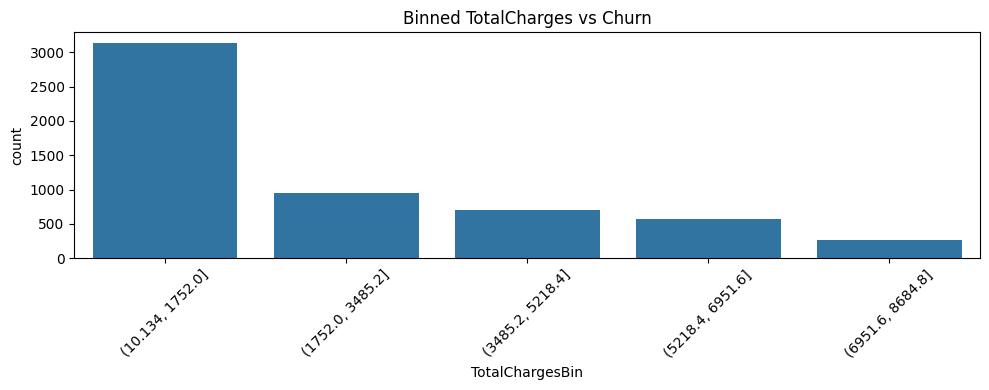

In [72]:
# First, make sure TotalCharges is numeric (in case it has some bad values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Create bins
df['TotalChargesBin'] = pd.cut(df['TotalCharges'], bins=5)

# Plot the distribution of binned TotalCharges vs Churn
plt.figure(figsize=(10, 4))
sns.countplot(x='TotalChargesBin', data=df)
plt.title('Binned TotalCharges vs Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<a id="summary_initial_data_analysis"></a>
# <b><span style='color:#FFCC54'> Step 2 | Summary | Initial Data Analysis</span></b>

<h3 style="color:gold">2.1 Dataset Overview</h3>
<ul>
  <li>7032 rows, 21 columns (including target variable)</li>
  <li>Mix of Object, Integer & Float data types</li>
  <li>0 true missing values</li>
</ul>

<h3 style="color:gold">2.2 Summary Statistics</h3>

<h4 style="color:goldenrod;">Missing values </h4>
<ul>
  <li>0 true missing values</li>
  <li>10 hidden null-like values in TotalCharges</li>
  <li><strong>Partner</strong> (Yes/No): Slightly skewed toward <strong>not having a partner</strong>.</li>
  <li><strong>SeniorCitizen</strong> (1/0): About 16% of userbase are senior citizens.</li>
</ul>

<h4 style="color:goldenrod;">Customer Profile</h4>
<ul>
  <li><strong>customerID</strong>: All IDs are present — no missing values or duplicates.</li>
  <li><strong>gender</strong> (Male/Female): Slightly skewed toward <strong>male</strong>.</li>
  <li><strong>Partner</strong> (Yes/No): Slightly skewed toward <strong>not having a partner</strong>.</li>
  <li><strong>SeniorCitizen</strong> (1/0): About 16% of userbase are senior citizens.</li>
</ul>

<h4 style="color:goldenrod;">Phone Services</h4>
<ul>
  <li><strong>PhoneService</strong> (Yes/No): Most (~90%) <strong>have</strong> phone service.</li>
  <li><strong>MultipleLines</strong> (Yes/No/No phone service):
    <ul>
      <li>~48% have only one line</li>
      <li>~42% have multiple lines</li>
      <li>~9% have no phone service</li>
    </ul>
  </li>
</ul>

<h4 style="color:goldenrod;">Internet & Online Features</h4>
<ul>
  <li><strong>InternetService</strong> (Fiber optic/DSL/No):
    <ul>
      <li>~44% have fiber optic</li>
      <li>~34% have DSL</li>
      <li>~22% have no internet service</li>
    </ul>
  </li>
  <li><strong>OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport</strong> (Yes/No/No internet service):
    <ul>
      <li>Most have <strong>No</strong> (~44–50%)</li>
      <li>~29–34% have the service</li>
      <li>~22% have no internet</li>
    </ul>
  </li>
  <li><strong>StreamingTV and StreamingMovies</strong> (Yes/No/No internet service):
    <ul>
      <li>~40% don’t have the service</li>
      <li>~38% do have the service</li>
      <li>~22% have no internet</li>
    </ul>
  </li>
</ul>

<h4 style="color:goldenrod;">Tenure, Contracts & Payments</h4>
<ul>
  <li><strong>Contract</strong> (Month-to-month/One year/Two year):
    <ul>
      <li>~55% month-to-month</li>
      <li>~24% two-year</li>
      <li>~21% one-year</li>
    </ul>
  </li>

  <li><strong>Tenure</strong> (Integer - Months):
    <ul>
      <li>* Includes 0 values, will need to be investigated</li>
      <li>Average: ~32 months (high variation)</li>
      <li>Some customers just joined</li>
      <li>Median: less than 29 months</li>
      <li>Maximum: 72 months (6 years)</li>
    </ul>
  </li>

  <li><strong>MonthlyCharges</strong> (Float - USD):
    <ul>
      <li>Average: ~$65</li>
      <li>Minimum: $18.25</li>
      <li>Median: ~$70</li>
      <li>Maximum: ~$119</li>
    </ul>
  </li>

  <li><strong>TotalCharges</strong> is an object, yet should be numerical (will need to change). Also has some have null charges (need to address):
  </li>
  <ul></ul>
  

  <li><strong>PaperlessBilling</strong> (Yes/No):
    <ul>
      <li>59% use paperless billing</li>
      <li>41% do not</li>
    </ul>
  </li>

  <li><strong>PaymentMethod</strong>:
    <ul>
      <li>34% use <strong>Electronic Check</strong></li>
      <li>23% use <strong>Mailed Check</strong></li>
      <li>22% use <strong>Bank Transfer (automatic)</strong></li>
      <li>22% use <strong>Credit Card (automatic)</strong></li>
    </ul>
  </li>
</ul>

<h4 style="color:goldenrod;">Churn (Target Variable)</h4>
<ul>
  <li><strong>Churn</strong> (Yes/No):
    <ul>
      <li><strong>73%</strong> did <strong>not churn</strong></li>
      <li><strong>27%</strong> did churn</li>
      <li><em>Imbalanced target — may require handling for modeling</em></li>
    </ul>
  </li>
</ul>

<h3 style="color:gold">2.3 Feature Investigation (Outliers)</h3>

<h4 style="color:goldenrod;">Outliers</h4>
<ul>
  <li><strong>Outliers</strong> were not present in this dataset (unusual, again):
    <ul>
      <li><strong>Tenure </strong> was long-tail skewed with more customers existing for less time than more</li>
      <li><strong>MonthlyCharges</strong> were short-tail skewed with more customers paying a larger amount, with some very large charges</li>
      <li><strong>TotalCharges</strong> were long-tailed skewed initially with more customers paying less overall, but within the tail, total charges were uniform</li>
        <ul>
          <li>There were 11 null total charges, which will need to be addressed</li>
        </ul>
    </ul>
  </li>
</ul>

<a id="target_investigation"></a>
# <p style="background-color: #4893D7; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 3 | Target (Churn) Investigation</p>

<a id="Correlation_analysis"></a>
# <b><span style='color:4893D7'>Step 3.1 |</span><span style='color:lightblue'> Churn by Feature </span></b>

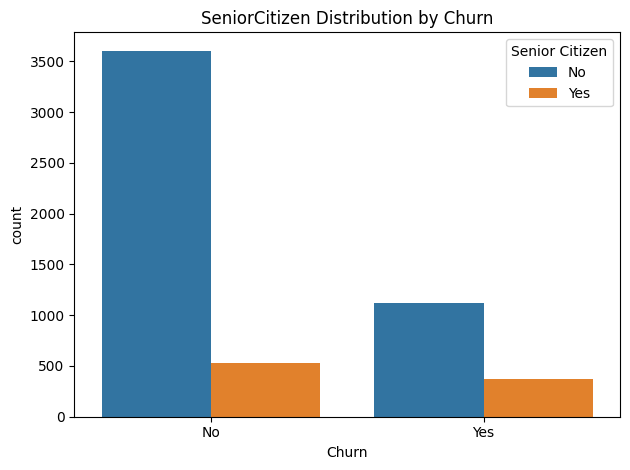

In [76]:
## Senior Citizen

sns.countplot(x='Churn', hue='SeniorCitizen', data=df)
plt.title('SeniorCitizen Distribution by Churn')
plt.legend(title='Senior Citizen', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

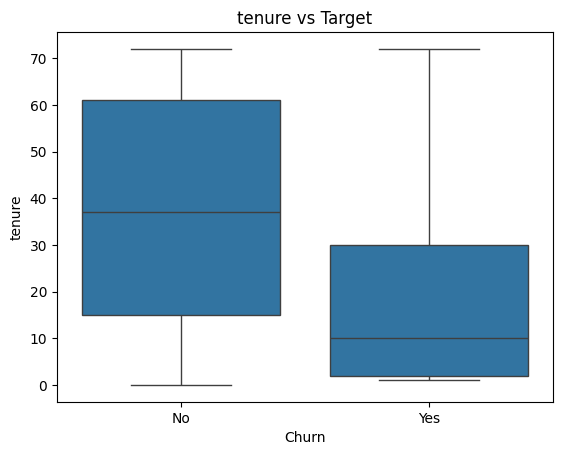

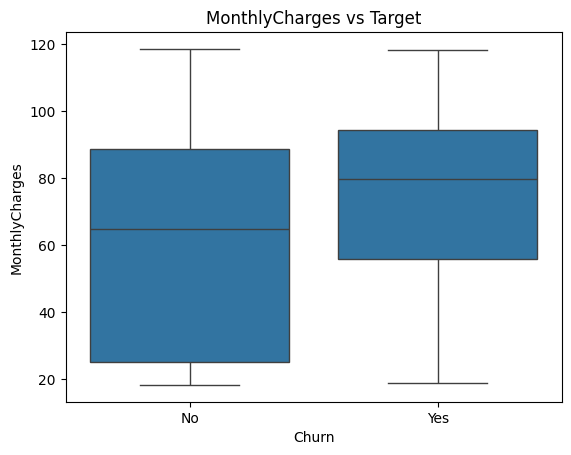

In [77]:
num_cols = df[['tenure', 'MonthlyCharges']]
for col in num_cols:
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Target')
    plt.show()

In [78]:
# Get all categorical features excluding the target
cat_cols = df.select_dtypes(include='object').drop(columns=['Churn','TotalCharges','customerID'])
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} Distribution by Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

KeyError: "['TotalCharges'] not found in axis"

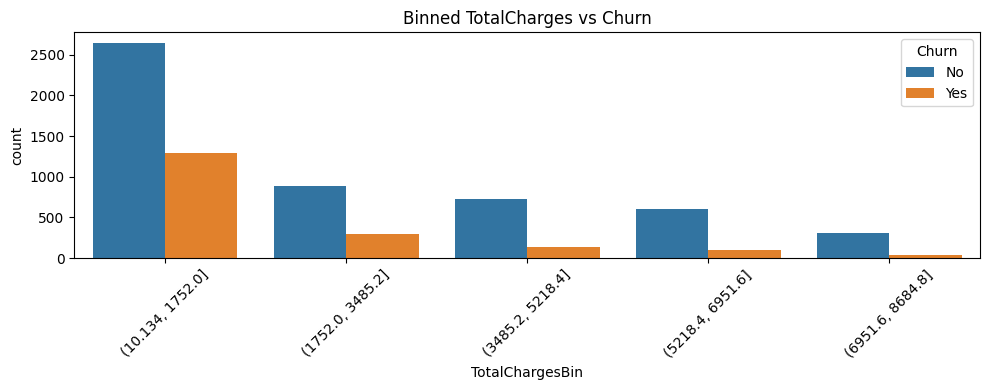

In [ ]:
# First, make sure TotalCharges is numeric (in case it has some bad values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Create bins
df['TotalChargesBin'] = pd.cut(df['TotalCharges'], bins=5)

# Plot the distribution of binned TotalCharges vs Churn
plt.figure(figsize=(10, 4))
sns.countplot(x='TotalChargesBin', hue='Churn', data=df)
plt.title('Binned TotalCharges vs Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<a id="Correlation_analysis"></a>
# <b><span style='color:4893D7'>Step 3.2 |</span><span style='color:lightblue'> Correlation Analysis </span></b>

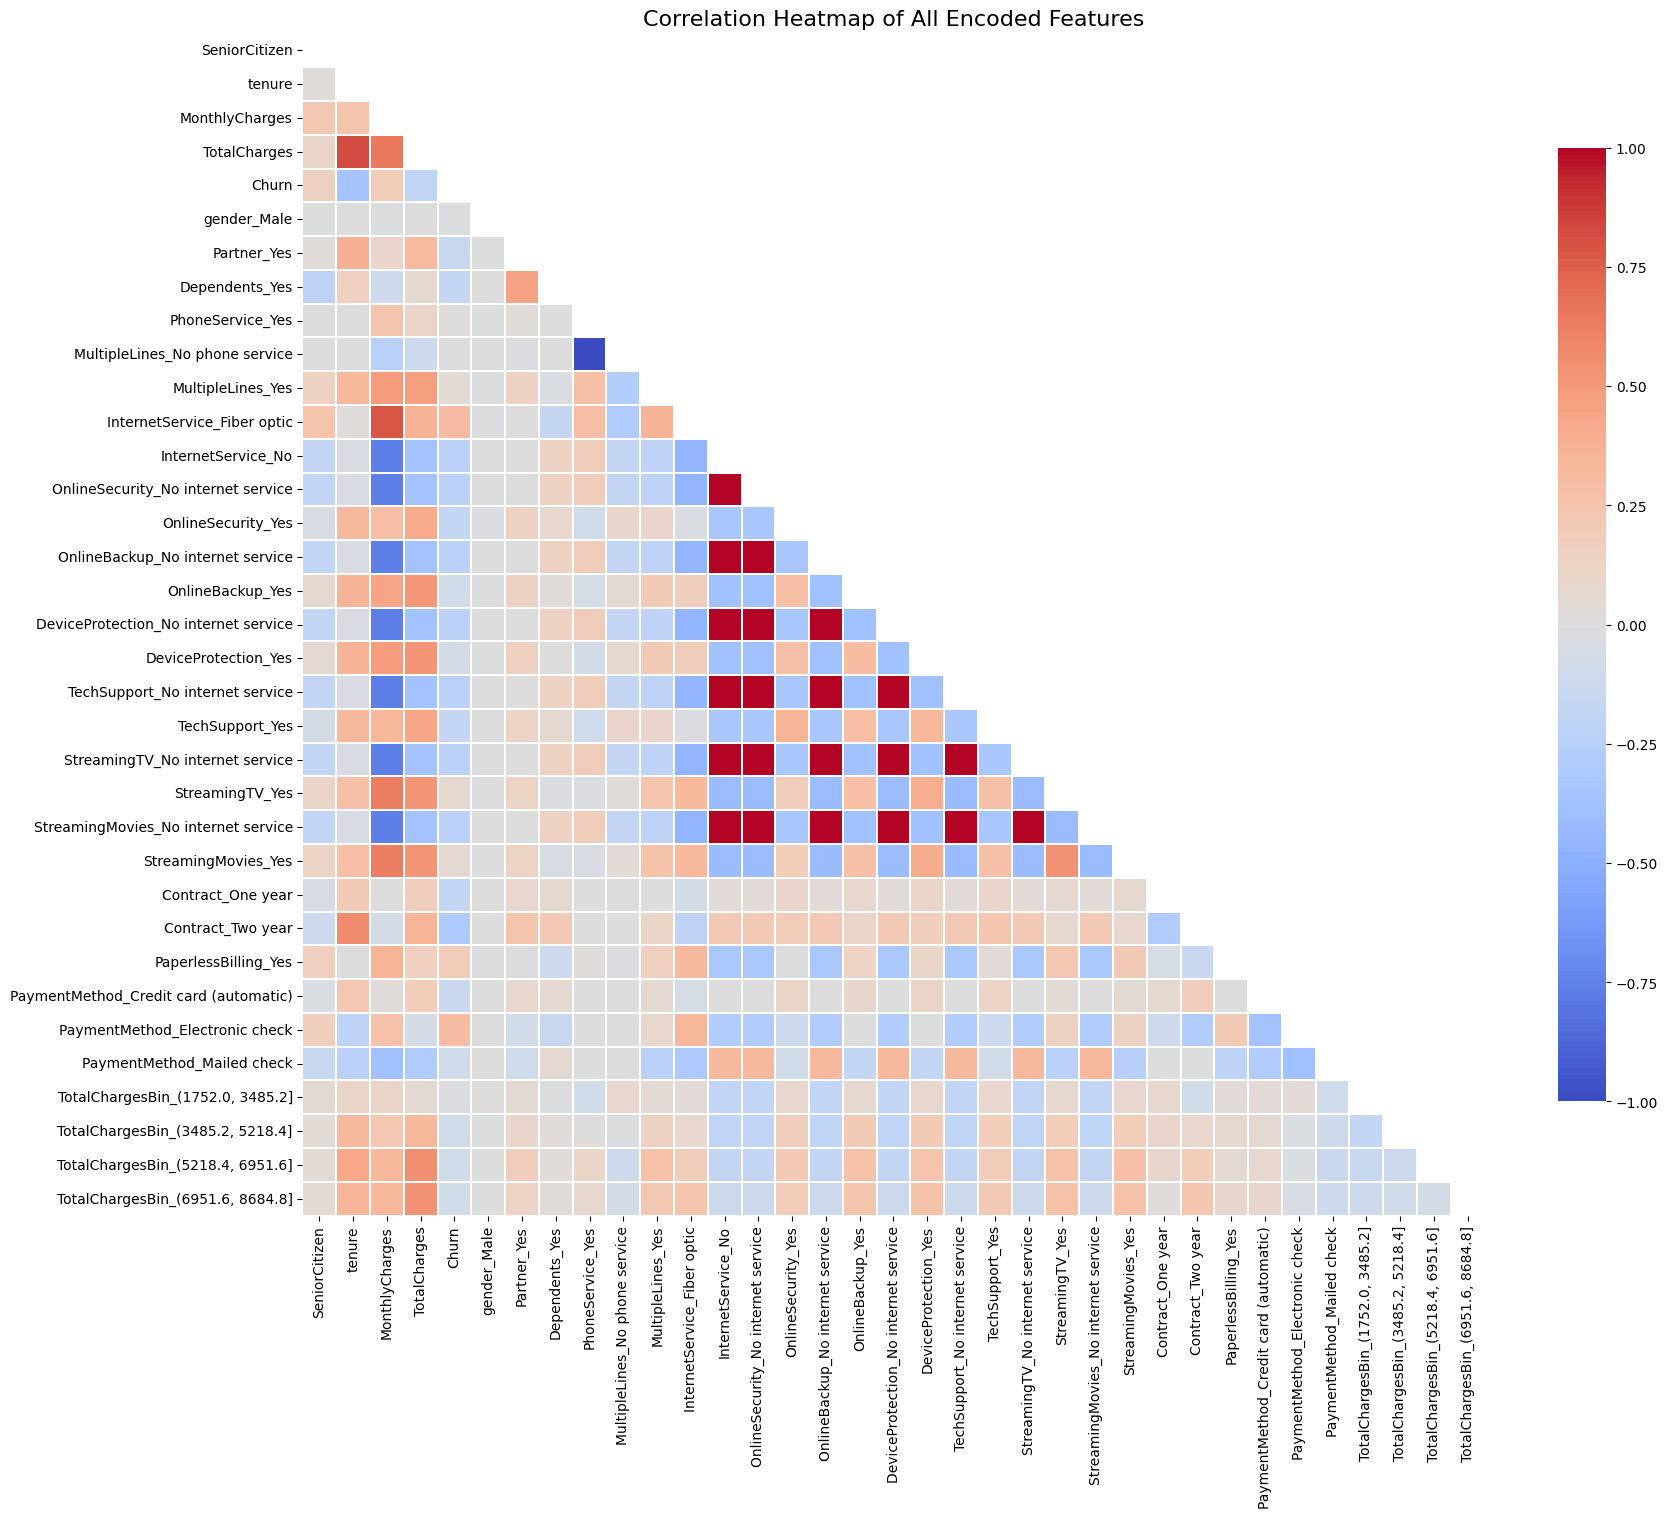

In [ ]:
# Full Correlation Analysis

# Create matrix
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})
df_corr['TotalCharges'] = pd.to_numeric(df_corr['TotalCharges'], errors='coerce')
df_corr = df_corr.drop(columns=['customerID'])
df_encoded = pd.get_dummies(df_corr, drop_first=True)
corr_matrix = df_encoded.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot Heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=False, 
            square=True, linewidths=0.3, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of All Encoded Features', fontsize=16)
plt.tight_layout()
plt.show()


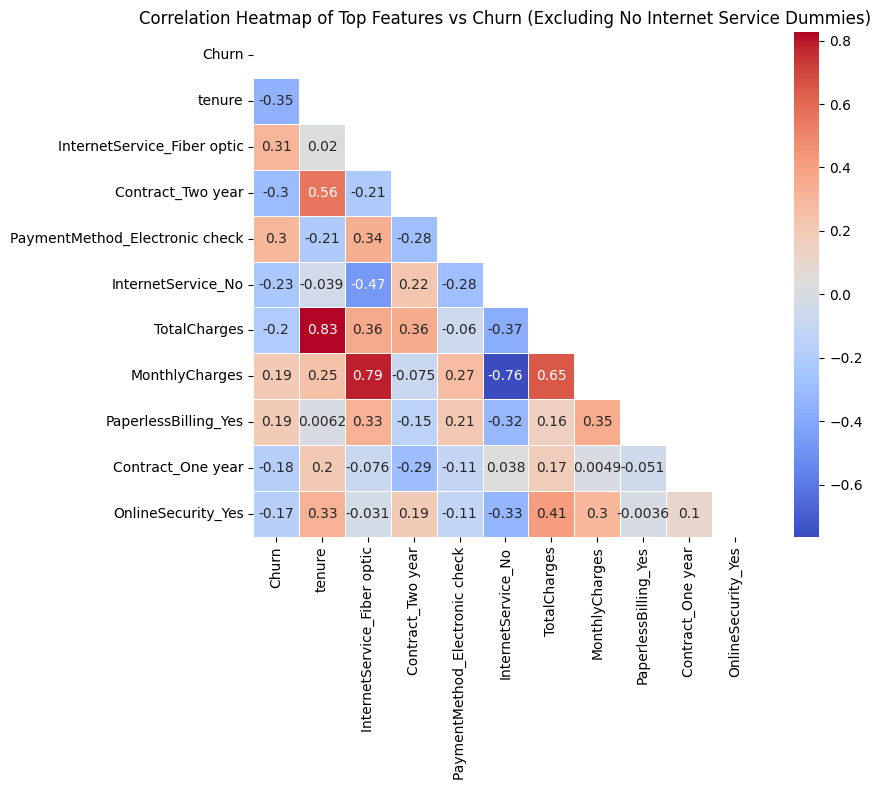

Top features correlated with Churn:
tenure                            0.352229
InternetService_Fiber optic       0.308020
Contract_Two year                 0.302253
PaymentMethod_Electronic check    0.301919
InternetService_No                0.227890
TotalCharges                      0.199484
MonthlyCharges                    0.193356
PaperlessBilling_Yes              0.191825
Contract_One year                 0.177820
OnlineSecurity_Yes                0.171226
Name: Churn, dtype: float64


In [ ]:
# Removing no internet service as it creates perfect correlations: # Drop "No internet service" dummy columns from encoded DataFrame
cols_to_exclude = [col for col in df_encoded.columns if 'No internet service' in col]
df_filtered = df_encoded.drop(columns=cols_to_exclude)

target_corr = df_filtered.corr()['Churn']

top_features = target_corr.abs().sort_values(ascending=False).head(11).index
top_corr_matrix = df_filtered[top_features].corr()
mask = np.triu(np.ones_like(top_corr_matrix, dtype=bool))

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, mask=mask, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Top Features vs Churn (Excluding No Internet Service Dummies)')
plt.tight_layout()
plt.show()

# Show top correlated values
target_corr = top_corr_matrix['Churn'].sort_values(ascending=False)
print("Top features correlated with Churn:")
print(target_corr.drop('Churn').abs().sort_values(ascending=False).head(10))

<a id="summary_initial_data_analysis"></a>
# <b><span style='color:#FFCC54'> Step 3 | Target (Churn) Investigation </span></b>

<h3 style="color:gold">3.1 Feature Investigation (Target Variable (Churn))</h3>

<ul>

  <li><strong>SeniorCitizen</strong> (Binary: 0 = No, 1 = Yes):
    <ul>
      <li>Most customers are not senior citizens</li>
      <li>Senior citizens make up a higher proportion of those who churn</li>
    </ul>
  </li>

  <li><strong>Tenure</strong> (Integer - Months):
    <ul>
      <li>Customers with lower tenure are significantly more likely to churn</li>
      <li>Churn rate decreases as tenure increases</li>
    </ul>
  </li>

  <li><strong>MonthlyCharges</strong> (Float - USD):
    <ul>
      <li>Higher monthly charges are associated with a higher churn rate</li>
      <li>Customers with low monthly charges are less likely to churn</li>
    </ul>
  </li>

  <li><strong>Gender</strong> (Male/Female):
    <ul>
      <li>Churn is evenly distributed across genders</li>
    </ul>
  </li>

  <li><strong>Partner</strong> (Yes/No):
    <ul>
      <li>Customers without a partner are more likely to churn</li>
    </ul>
  </li>

  <li><strong>Dependents</strong> (Yes/No):
    <ul>
      <li>Customers with no dependents are more likely to churn</li>
    </ul>
  </li>

  <li><strong>PhoneService</strong> (Yes/No):
    <ul>
      <li>Churn is roughly evenly distributed among customers with and without phone service</li>
    </ul>
  </li>

  <li><strong>MultipleLines</strong> (Yes/No/No phone service):
    <ul>
      <li>Customers with multiple lines are more likely to churn</li>
      <li>Churn is similar for customers with a single line or no phone service</li>
    </ul>
  </li>

  <li><strong>InternetService</strong> (DSL/Fiber optic/No):
    <ul>
      <li>Customers with fiber optic internet are much more likely to churn</li>
      <li>Churn is lower for DSL users</li>
    </ul>
  </li>

  <li><strong>OnlineSecurity</strong> (Yes/No/No internet service):
    <ul>
      <li>Customers without online security are more likely to churn</li>
      <li>Churn is lower among customers with online security</li>
    </ul>
  </li>

  <li><strong>OnlineBackup</strong> (Yes/No/No internet service):
    <ul>
      <li>Customers without online backup are more likely to churn</li>
      <li>Churn is lower among those with backup</li>
    </ul>
  </li>

  <li><strong>DeviceProtection</strong> (Yes/No/No internet service):
    <ul>
      <li>Customers without device protection are more likely to churn</li>
      <li>Having device protection is associated with lower churn</li>
    </ul>
  </li>

  <li><strong>TechSupport</strong> (Yes/No/No internet service):
    <ul>
      <li>Customers without tech support are more likely to churn</li>
      <li>Churn is lower among those who have tech support</li>
    </ul>
  </li>

  <li><strong>StreamingTV</strong> (Yes/No/No internet service):
    <ul>
      <li>Slightly higher churn among customers without streaming TV</li>
    </ul>
  </li>

  <li><strong>StreamingMovies</strong> (Yes/No/No internet service):
    <ul>
      <li>Slightly higher churn among customers without streaming movies</li>
    </ul>
  </li>

  <li><strong>Contract</strong> (Month-to-month/One year/Two year):
    <ul>
      <li>Month-to-month contract customers are much more likely to churn</li>
      <li>Churn decreases with longer-term contracts</li>
    </ul>
  </li>

  <li><strong>PaperlessBilling</strong> (Yes/No):
    <ul>
      <li>Customers with paperless billing are more likely to churn</li>
    </ul>
  </li>

  <li><strong>PaymentMethod</strong>:
    <ul>
      <li><strong>Electronic check</strong> users are much more likely to churn</li>
      <li><strong>Mailed check</strong> and <strong>Bank transfer (automatic)</strong> users show slightly lower churn</li>
      <li><strong>Credit card (automatic)</strong> users have the lowest churn</li>
    </ul>
  </li>

  <li><strong>TotalCharges</strong> (Float - USD):
    <ul>
      <li>Lower total charges are associated with higher churn</li>
      <li>Churn decreases steadily as total charges increase</li>
    </ul>
  </li>

</ul>

<h3 style="color:gold">3.2 Correlation Analysis</h3>

<ul>
  <li><strong>Tenure</strong>:
    <ul>
      <li>Lower tenure (<strong>~0.35 correlation</strong>) is associated with higher churn</li>
    </ul>
  </li>

  <li><strong>InternetService</strong>:
    <ul>
      <li><strong>Fiber optic</strong> users are much more likely to churn (<strong>0.31 correlation</strong>)</li>
      <li><strong>No internet service</strong> customers tend to churn less (<strong>0.23 correlation</strong>)</li>
    </ul>
  </li>

  <li><strong>Contract</strong>:
    <ul>
      <li><strong>Two year</strong> contracts are strongly associated with lower churn (<strong>0.30 correlation</strong>)</li>
      <li><strong>One year</strong> contracts have moderate churn association (<strong>0.18 correlation</strong>)</li>
    </ul>
  </li>

  <li><strong>PaymentMethod</strong>:
    <ul>
      <li><strong>Electronic check</strong> users are much more likely to churn (<strong>0.30 correlation</strong>)</li>
    </ul>
  </li>

  <li><strong>TotalCharges</strong>:
    <ul>
      <li>Lower total charges are associated with higher churn (<strong>0.20 correlation</strong>)</li>
    </ul>
  </li>

  <li><strong>MonthlyCharges</strong>:
    <ul>
      <li>Higher monthly charges tend to be linked with increased churn (<strong>0.19 correlation</strong>)</li>
    </ul>
  </li>

  <li><strong>PaperlessBilling</strong>:
    <ul>
      <li>Customers with paperless billing have slightly higher churn rates (<strong>0.19 correlation</strong>)</li>
    </ul>
  </li>

  <li><strong>OnlineSecurity</strong>:
    <ul>
      <li>Customers with online security are slightly more likely to churn (<strong>0.17 correlation</strong>)</li>
    </ul>
  </li>


  <h4 style="color:gold">Insights for the client</h4>

<ul>
  <li><strong>Early-Stage Customers</strong>:
    <ul>
      <li>Focus on improving onboarding and retention efforts to reduce churn among new customers</li>
    </ul>
  </li>

  <li><strong>Fiber Optic Customers</strong>:
    <ul>
      <li>Review pricing and service packages to enhance satisfaction and reduce churn</li>
    </ul>
  </li>

  <li><strong>Contract Length</strong>:
    <ul>
      <li>Encourage longer contract commitments through incentives to increase customer loyalty</li>
    </ul>
  </li>

  <li><strong>Payment Methods</strong>:
    <ul>
      <li>Evaluate payment options and improve customer communication to address churn risks related to electronic checks</li>
    </ul>
  </li>

  <li><strong>Billing & Service Bundles</strong>:
    <ul>
      <li>Analyze billing and service packages to better align perceived value with customer expectations</li>
    </ul>
  </li>

  <li><strong>Paperless Billing</strong>:
    <ul>
      <li>Consider additional engagement strategies for paperless billing users to reduce churn risk</li>
    </ul>
  </li>

  <li><strong>Online Security</strong>:
    <ul>
      <li>Investigate reasons behind higher churn among customers with online security and address underlying concerns</li>
    </ul>
  </li>
</ul>



## Data Cleaning & Transformation

## Feature engineering 

## Outlier Detection & Treatment 

## Correlation Analysis

## Feature Scaling

## Dimensionality Reduction